# Predicting Car Prices:

In this project, we'll use the machine learning workflow to predict a car's market price using its `attributes`. The data set we will be working with contains information on various cars. For each car we have information about the technical aspects of the vehicle such as the motor's displacement, the weight of the car, the miles per gallon, how fast the car accelerates, and more. 

Data can be directly downloaded from [Machine Learning Repository](https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data) and also attached in the same repository.

As per the documentation of [Machine Learning Repository](https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data) following `attributes` should be there on dataset:

Attribute | Attribute Range 
----------------------|-------------------
**symboling** | -3, -2, -1, 0, 1, 2, 3. 
**normalized-losses**|continuous from 65 to 256. 
**make** | alfa-romero, audi, bmw, chevrolet, dodge, honda, isuzu, jaguar, mazda, mercedes-benz, mercury, mitsubishi, nissan, peugot, plymouth, porsche, renault, saab, subaru, toyota, volkswagen, volvo 
**fuel-type**| diesel, gas. 
**aspiration**| std, turbo. 
**num-of-doors**| four, two. 
**body-style**| hardtop, wagon, sedan, hatchback, convertible. 
**drive-wheels**| 4wd, fwd, rwd. 
**engine-location**| front, rear. 
**wheel-base**| continuous from 86.6 120.9. 
**length**| continuous from 141.1 to 208.1. 
**width**| continuous from 60.3 to 72.3. 
**height**| continuous from 47.8 to 59.8. 
**curb-weight**| continuous from 1488 to 4066. 
**engine-type**| dohc, dohcv, l, ohc, ohcf, ohcv, rotor. 
**num-of-cylinders**| eight, five, four, six, three, twelve, two. 
**engine-size**| continuous from 61 to 326. 
**fuel-system**| 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi. 
**bore**| continuous from 2.54 to 3.94. 
**stroke**| continuous from 2.07 to 4.17. 
**compression-ratio**| continuous from 7 to 23. 
**horsepower**| continuous from 48 to 288. 
**peak-rpm**| continuous from 4150 to 6600. 
**city-mpg**| continuous from 13 to 49. 
**highway-mpg**| continuous from 16 to 54. 
**price**| continuous from 5118 to 45400.




## Reading in data:

In [4]:
import pandas as pd
cars = pd.read_csv("imports-85.data")
pd.options.display.max_columns = 90

In [5]:
cars.head()

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,168.80,64.10,48.80,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


Column names are not defined in the above dataset.

In [6]:

cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

Reading data file again:

In [8]:
cars = pd.read_csv("imports-85.data",names=cols)

In [9]:
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


We need to predict the price, so our target column is `price` column.

In [11]:
cars.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-rate     0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

We can see there is no `null` defined but `?` is assigned for missing values.

## Replacing and handling values:

In [23]:
import numpy as np
value = np.nan
cars = cars.replace("?",value)

In [24]:
# working only on numeric columns those with continuous values.
# We can see from above mentioned attributes table which columns are continuous.
continuous_cols = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

In [25]:
numeric_cars = cars[continuous_cols]

In [26]:
numeric_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,NaN,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,13495
1,NaN,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,16500
2,NaN,94.5,171.2,65.5,52.4,2823,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,3.19,3.40,8.0,115,5500,18,22,17450


In [28]:
numeric_cars.dtypes

normalized-losses     object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
bore                  object
stroke                object
compression-rate     float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [30]:
numeric_cars["normalized-losses"]= numeric_cars["normalized-losses"].astype(float)

A:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [31]:
numeric_cars.dtypes

normalized-losses    float64
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
bore                  object
stroke                object
compression-rate     float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [32]:
numeric_cars.isnull().sum()

normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [33]:
#Replacing Nan values with mean value
numeric_cars["normalized-losses"].fillna(value = numeric_cars["normalized-losses"].mean(),inplace=True )

A:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [34]:
numeric_cars.isnull().sum()

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
bore                 4
stroke               4
compression-rate     0
horsepower           2
peak-rpm             2
city-mpg             0
highway-mpg          0
price                4
dtype: int64

In [36]:
numeric_cars.shape

(205, 14)

We can see, there are total `204` rows in the dataset. And now there are very little values are missing. Let's drop the unnecessary ones.

In [38]:
numeric_cars.dropna(axis=0,subset=["price"],inplace=True)

A:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [39]:
numeric_cars.isnull().sum()

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
bore                 4
stroke               4
compression-rate     0
horsepower           2
peak-rpm             2
city-mpg             0
highway-mpg          0
price                0
dtype: int64

Replacing other column values with their mean values.

In [52]:
numeric_cars[["bore","stroke","horsepower","peak-rpm","price"]]=numeric_cars[["bore","stroke","horsepower","peak-rpm","price"]].astype(float)

In [53]:
numeric_cars = numeric_cars.fillna(numeric_cars.mean())

In [54]:
numeric_cars.isna().sum()

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
bore                 0
stroke               0
compression-rate     0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

## Normalizing column values:
Except `price` column, as it is the target column.

In [57]:
price = numeric_cars["price"]
numeric_cars = (numeric_cars - numeric_cars.min())/(numeric_cars.max()-numeric_cars.min())
numeric_cars["price"] = price

In [58]:
numeric_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,0.207959
1,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,0.282558
2,0.298429,0.230321,0.449254,0.444444,0.383333,0.517843,0.100000,0.666667,0.1250,0.495327,0.346939,0.166667,0.263158,0.282558
3,0.518325,0.384840,0.529851,0.504274,0.541667,0.329325,0.464286,0.633333,0.1875,0.252336,0.551020,0.305556,0.368421,0.219254
4,0.518325,0.373178,0.529851,0.521368,0.541667,0.518231,0.464286,0.633333,0.0625,0.313084,0.551020,0.138889,0.157895,0.306142


Values are normalized now and are between 0 and 1.

## Univariate k-nearest neighbors model:

In [61]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
def knn_train_test(train_col,test_col,df):
    train_df = df[[train_col]]
    test_df = df[test_col]
    knn = KNeighborsRegressor()
    knn.fit(train_df,test_df)
    predicted_price = knn.predict(train_df)
    mse = mean_squared_error(predicted_price,test_df)
    rmse = mse**(0.5)
    return rmse
    
    

In [71]:
col_list = numeric_cars.columns
col_list = col_list.drop("price")

In [72]:
colwise_rmse = {}
for col in col_list:
    rmse = knn_train_test(col,"price",numeric_cars)
    colwise_rmse[col] = rmse

In [73]:
colwise_rmse

{'normalized-losses': 0.15257103818686832,
 'wheel-base': 0.10919755581959346,
 'length': 0.10456149450399023,
 'width': 0.08552206935831214,
 'height': 0.1650163539684917,
 'curb-weight': 0.08975395689574964,
 'bore': 0.1473008007382597,
 'stroke': 0.16915173415397045,
 'compression-rate': 0.14281208482333574,
 'horsepower': 0.0769037830638235,
 'peak-rpm': 0.17708061206278872,
 'city-mpg': 0.1024399067196518,
 'highway-mpg': 0.09525123314349687}

In [74]:
min(colwise_rmse,key=colwise_rmse.get)

'horsepower'

`horsepower` has the lowest rmse value and hence performed best using default `k` value.

In [75]:
def knn_train_test(train_col,test_col,df):
    train_df = df[[train_col]]
    test_df = df[test_col]
    k_values =[1,3,5,7,9]
    k_dict ={}
    for k in k_values:
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df,test_df)
        predicted_price = knn.predict(train_df)
        mse = mean_squared_error(predicted_price,test_df)
        rmse = mse**(0.5)
        k_dict[k] = rmse
    return k_dict

colwise_rmse = {}
for col in col_list:
    rmse = knn_train_test(col,"price",numeric_cars)
    colwise_rmse[col] = rmse

    

In [76]:
colwise_rmse

{'normalized-losses': {1: 0.1947865220092037,
  3: 0.16123933598921422,
  5: 0.15257103818686832,
  7: 0.1591875633147449,
  9: 0.1719312364174679},
 'wheel-base': {1: 0.0687852628522036,
  3: 0.08057147653148027,
  5: 0.10919755581959346,
  7: 0.12635639200924068,
  9: 0.1313639629944989},
 'length': {1: 0.06501970561418813,
  3: 0.08776124703007193,
  5: 0.10456149450399023,
  7: 0.11322875737000793,
  9: 0.11921317266443002},
 'width': {1: 0.10904691093872908,
  3: 0.07743336852115258,
  5: 0.08552206935831214,
  7: 0.09314450634296689,
  9: 0.09935114110060494},
 'height': {1: 0.1836717522905536,
  3: 0.17286766183966626,
  5: 0.1650163539684917,
  7: 0.1657084450208154,
  9: 0.16930004099676435},
 'curb-weight': {1: 0.03747303702930514,
  3: 0.078517701290385,
  5: 0.08975395689574964,
  7: 0.0908967815819761,
  9: 0.09041698942673398},
 'bore': {1: 0.17715816506177218,
  3: 0.1398997403651076,
  5: 0.1473008007382597,
  7: 0.1498421740090458,
  9: 0.15217153049943913},
 'stroke':

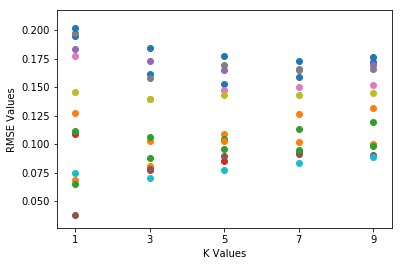

In [81]:
import matplotlib.pyplot as plt

#colwise_rmse 
for key in colwise_rmse:
    x = colwise_rmse[key].keys()
    y = colwise_rmse[key].values()
    plt.scatter(x,y)
    plt.xlabel("K Values")
    plt.ylabel("RMSE Values")
    plt.xticks([1,3,5,7,9])


## Multivariate k-nearest neighbors model:

In [86]:
# computing average RMSE value for each feature
#colwise_rmse
colwise_avg_rmse = {}
for k,v in colwise_rmse.items():
    avg_rmse = np.mean(list(v.values()))
    colwise_avg_rmse[k] = avg_rmse
feature_avg_rmse = pd.Series(colwise_avg_rmse)
feature_avg_rmse.sort_values()
        
    
    

curb-weight          0.077412
horsepower           0.078866
width                0.092900
length               0.097957
highway-mpg          0.101040
wheel-base           0.103255
city-mpg             0.106651
compression-rate     0.143185
bore                 0.153274
normalized-losses    0.167943
stroke               0.170973
height               0.171313
peak-rpm             0.182537
dtype: float64

In [98]:
def knn_train_test(train_col,test_col,df):
    train_df = df[train_col]
    test_df = df[test_col]
    knn = KNeighborsRegressor()
    knn.fit(train_df,test_df)
    predicted_price = knn.predict(train_df)
    mse = mean_squared_error(predicted_price,test_df)
    rmse = mse**(0.5)
    return rmse

_2f = ["curb-weight","horsepower"]
_3f =["curb-weight","horsepower","width"]
_4f =["curb-weight","horsepower","width","length"]
_5f = ["curb-weight","horsepower","width","length","highway-mpg"]
features_list = [_2f,_3f,_4f,_5f]
features_rmse = {}
for features in features_list:
    rmse = knn_train_test(features,"price",numeric_cars)
    key = str(features)
    features_rmse[key] = rmse

In [99]:
features_rmse

{"['curb-weight', 'horsepower']": 0.05779425595725493,
 "['curb-weight', 'horsepower', 'width']": 0.059362040568372354,
 "['curb-weight', 'horsepower', 'width', 'length']": 0.05926904601431064,
 "['curb-weight', 'horsepower', 'width', 'length', 'highway-mpg']": 0.05940097347476873}

# Multivariate Model:
Varying k value from (1 to 25)

In [101]:
def knn_train_test(train_col,test_col,df):
    train_df = df[train_col]
    test_df = df[test_col]
    k_range = np.arange(1,26)
    k_dict = {}
    for k in k_range:
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df,test_df)
        predicted_price = knn.predict(train_df)
        mse = mean_squared_error(predicted_price,test_df)
        rmse = mse**(0.5)
        k_dict[k]=rmse
    return k_dict

_2f = ["curb-weight","horsepower"]
_3f =["curb-weight","horsepower","width"]
_4f =["curb-weight","horsepower","width","length"]

features_list = [_2f,_3f,_4f]
features_rmse = {}

for features in features_list:
    multiple_rmse = knn_train_test(features,"price",numeric_cars)
    key = str(features)
    features_rmse[key] = multiple_rmse

In [102]:
features_rmse

{"['curb-weight', 'horsepower']": {1: 0.010030628892053643,
  2: 0.03110350759311371,
  3: 0.0451234565893699,
  4: 0.054851340622230405,
  5: 0.05779425595725493,
  6: 0.058418860795078076,
  7: 0.06319573528845818,
  8: 0.06776933111280295,
  9: 0.07129553380266197,
  10: 0.07526920790296678,
  11: 0.07796655248901982,
  12: 0.08122067310436291,
  13: 0.08338050076694978,
  14: 0.0863263936537741,
  15: 0.08769038599870813,
  16: 0.08956683554629609,
  17: 0.090638917356435,
  18: 0.09221947536314257,
  19: 0.09370512880395618,
  20: 0.0948033738250804,
  21: 0.09590885696736351,
  22: 0.09714037455428497,
  23: 0.0993453661042185,
  24: 0.10045048394040662,
  25: 0.10152387622235316},
 "['curb-weight', 'horsepower', 'width']": {1: 0.010025509283467108,
  2: 0.032755590185844764,
  3: 0.04585572878094661,
  4: 0.052596464260092235,
  5: 0.059362040568372354,
  6: 0.06321471063355111,
  7: 0.06465239607078017,
  8: 0.06705708952426405,
  9: 0.07088940692451426,
  10: 0.073659296991930

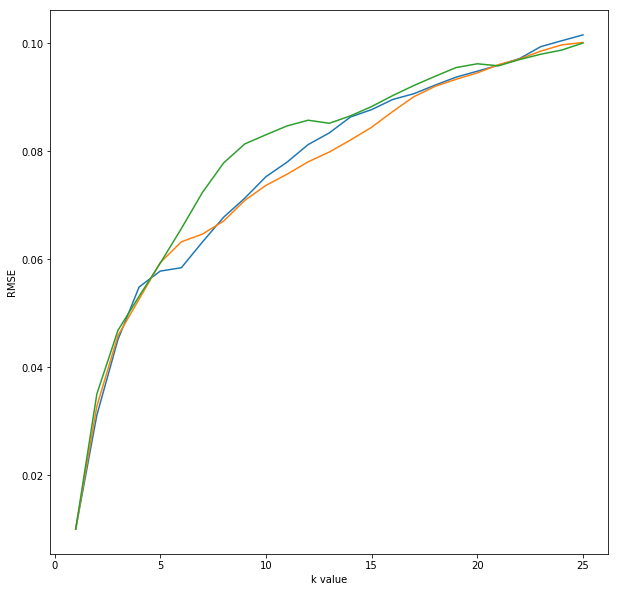

In [111]:
#features_rmse
plt.figure(figsize=(10,10))
for k,v in features_rmse.items():
    x = v.keys()
    y= v.values()
    plt.plot(x,y)
    plt.xlabel('k value')
    plt.ylabel('RMSE')

*****************************************
After going through the whole procedure we came to know following possibilities:
* Performance of train/test method isn't this much efficient
* We should also try to find error metric using cross validation or K fold
* We may need to use further columns because dependency on `k` isn't justified yet

## Conclusion:
Predicting the price based on relevant attributes is very important else we can face many oversized errors. For optimal prediction using `K nearest neighbors` we can use `k=10` and `relevant features` as per above plot.
